In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
import shap

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [4]:
# define three-year mortalitty status
df_train.loc[:,'MORTSTAT3Y'] = np.where((df_train["MORTSTAT"] == 1) & (df_train["TIMETOEVENT"] <= 3), 1, 0)
df_test.loc[:,'MORTSTAT3Y'] = np.where((df_test["MORTSTAT"] == 1) & (df_test["TIMETOEVENT"] <= 3), 1, 0)

In [5]:
# select features and target
X_train = df_train.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_train = df_train['MORTSTAT3Y']

X_test = df_test.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_test_ = df_test['MORTSTAT3Y']

In [6]:
# RFC SHAP

In [7]:
rfc = RandomForestClassifier(criterion='log_loss', random_state=42,
                             n_estimators=150, max_leaf_nodes=50, max_samples=0.1, max_features=None)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_features=None,
                       max_leaf_nodes=50, max_samples=0.1, n_estimators=150,
                       random_state=42)

In [8]:
explainer_rfc = shap.TreeExplainer(rfc)

# compute SHAP values for test set
shap_values_rfc = explainer_rfc.shap_values(X_test)

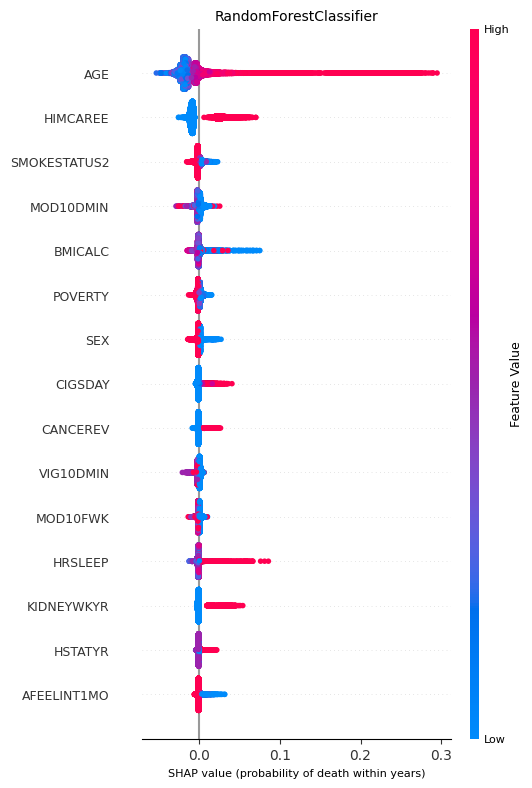

In [9]:
fig, ax = plt.subplots(figsize=(10, 2))

# generate SHAP Summary Plot inside the predefined figure
shap.summary_plot(shap_values_rfc.T[1].T, X_test, show=False, max_display=15)


plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.xlabel("SHAP value (probability of death within years)", fontsize=8)
plt.title("RandomForestClassifier", fontsize=10)
fig = plt.gcf()
fig.set_size_inches(5.2, 8) 


cbar = plt.gcf().axes[-1]  
cbar.tick_params(labelsize=8)
cbar.set_ylabel("Feature Value", fontsize=9)


plt.savefig('RandomForestClassifier_shap.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# GBS

In [11]:
gbc = GradientBoostingClassifier(loss='log_loss', random_state=42,
                                n_estimators=150, learning_rate=0.10, subsample=1, max_leaf_nodes=20, max_features=20)
                                        
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_features=20, max_leaf_nodes=20, n_estimators=150,
                           random_state=42, subsample=1)

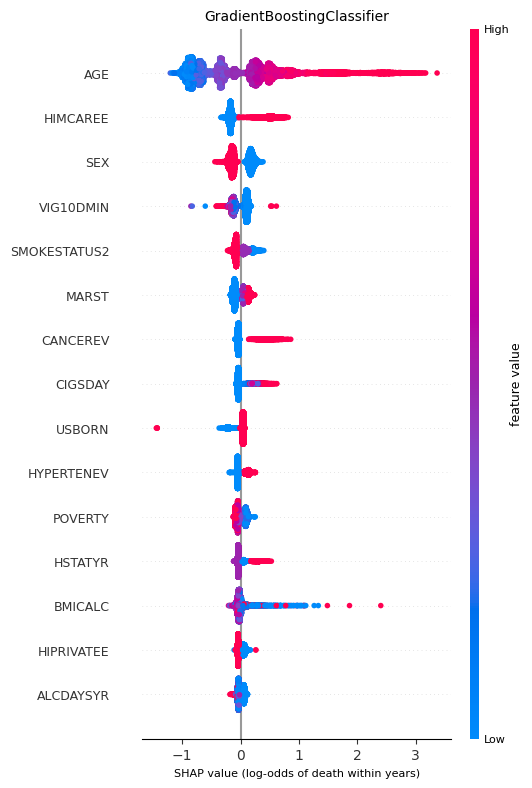

In [14]:
plt.figure(figsize=(5, 3))  

# initialize the explainer (keep model_output="raw")
explainer_gbc = shap.TreeExplainer(gbc)

shap_values_gbc = explainer_gbc.shap_values(X_test)

# create SHAP summary plot using probability-based SHAP values
shap.summary_plot(shap_values_gbc, X_test, show=False,  max_display=15)

plt.xticks(fontsize=10)  
plt.yticks(fontsize=9)  
plt.xlabel("SHAP value (log-odds of death within years)", fontsize=8)  
plt.title("GradientBoostingClassifier", fontsize=10) 
fig = plt.gcf()
fig.set_size_inches(5.2, 8) 

cbar = plt.gcf().axes[-1]  
cbar.tick_params(labelsize=8)  
cbar.set_ylabel("feature value", fontsize=9) 

plt.savefig('GradientBoostingClassifier_shap.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# XGBC

In [16]:
xgbc = XGBClassifier(objective='binary:logistic', random_state=42,
                     n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.5, colsample_bytree=0.8)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

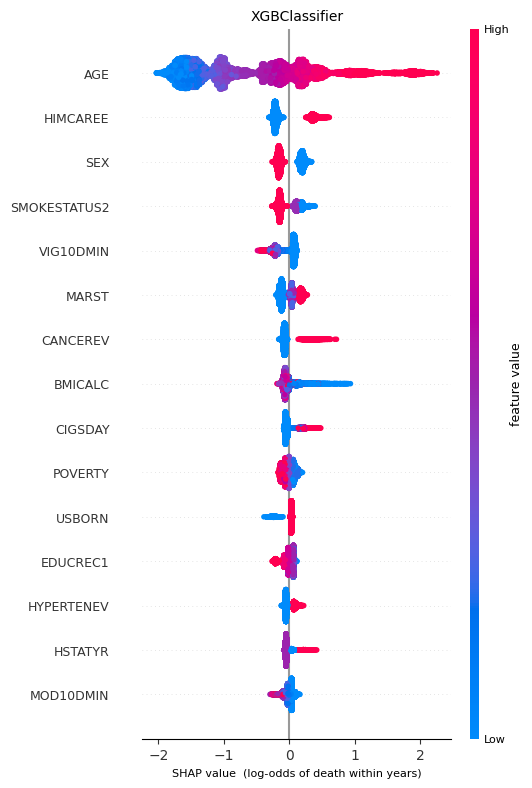

In [17]:
explainer_xgbc = shap.TreeExplainer(xgbc)

plt.figure(figsize=(5, 3))  


# compute SHAP values (raw log-odds output)
shap_values_xgbc = explainer_xgbc.shap_values(X_test)
# create SHAP summary plot using probability-based SHAP values
shap.summary_plot(shap_values_xgbc, X_test, show=False,  max_display=15)


plt.xticks(fontsize=10)  
plt.yticks(fontsize=9)  
plt.xlabel("SHAP value  (log-odds of death within years)", fontsize=8)  
plt.title("XGBClassifier", fontsize=10)
fig = plt.gcf()
fig.set_size_inches(5.2, 8) 

cbar = plt.gcf().axes[-1]  
cbar.tick_params(labelsize=8)  
cbar.set_ylabel("feature value", fontsize=9) 

plt.savefig('XGBClassifier_shap.png', format='png', dpi=300, bbox_inches='tight')
plt.show()